###  20 News Groups Corpus, Sample dataset included in scikit-learn
A collection of almost 20,000 articles on 20 different topics or 'newsgroups'.   
Corpus: Text Collection
more info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

twenty_groups = fetch_20newsgroups(subset='all', random_state=21) 
# we will do cross validation, so we fetch all data
# random state again same for all of you, so you all have the same shuffling for having same results

### These are the groups that the text samples originated from.

In [2]:
twenty_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Seeing what is the class of first entry:

In [3]:
i=0
twenty_groups.target[i]

18

#### Index 9 is rec.sport.baseball, lets look at the first entry and see if it makes sense:

In [4]:
twenty_groups.data[i]

'From: hallam@dscomsa.desy.de (Phill Hallam-Baker)\nSubject: Re: re: fillibuster\nLines: 55\nReply-To: hallam@zeus02.desy.de\nOrganization: DESYDeutsches Elektronen Synchrotron, Experiment ZEUS bei HERA\n\n\nIn article <1993Apr12.002302.5262@martha.utcc.utk.edu>, PA146008@utkvm1.utk.edu (David Veal) writes:\n\n|>>Come to that under the original plan there wasn\'t meant to be anything\n|>>much for the federal government to do except keep the British out.\n|>\n|>       That\'s also untrue, but at least we\'re wandering a little closer\n|>toward reality.  That the Articles of Confederation fell apart is enough\n|>proof it was there for just a tad bit more.\n\nWell yes and no. The Federalist papers are propaganda and it is therefore\ndifficult to determine precisely what Maddison etc were up to from them. They\ncertainly emphasised a limited role for the federal government but this\nwas not necessarily their true position.\n\n|>>And like the house of lords which it is copied from it was gi

## Q1: Is the full dataset balanced for each class? Do a barchart.

In [5]:
twenty_groups.target

array([18, 12,  9, ..., 11, 18,  7])

18846
Data
0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64


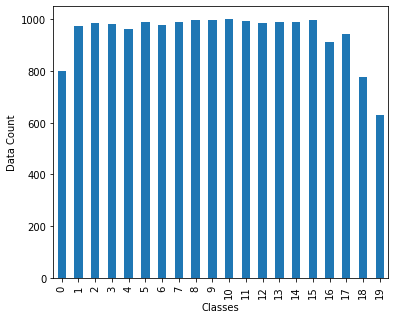

In [6]:
# ANSWER to Q1 goes here
########################
import matplotlib.pyplot as plt

print(twenty_groups.target.size)

df = pd.DataFrame(twenty_groups.target, columns = ['Data'])
df_data_sum = df.groupby('Data').size()

print(df_data_sum.head(50))

df_data_sum.plot(kind='bar', ylabel='Data Count', xlabel='Classes', figsize=(6, 5))

# Some of the classes have more datasets than others 


We want to work on a binary classification example.
Let's focus on one class 'misc.forsale', and name the rest as others.

Or let's say we wanted to have a model for detecting sales related emails, and 
used this dataset to train that model

In [7]:
type(twenty_groups.target_names)

list

In [8]:
twenty_groups.target_names.append('others')

In [9]:
len(twenty_groups.target_names)

21

In [10]:
for i in range(0,21):
  print(str(i) + " " + twenty_groups.target_names[i])

0 alt.atheism
1 comp.graphics
2 comp.os.ms-windows.misc
3 comp.sys.ibm.pc.hardware
4 comp.sys.mac.hardware
5 comp.windows.x
6 misc.forsale
7 rec.autos
8 rec.motorcycles
9 rec.sport.baseball
10 rec.sport.hockey
11 sci.crypt
12 sci.electronics
13 sci.med
14 sci.space
15 soc.religion.christian
16 talk.politics.guns
17 talk.politics.mideast
18 talk.politics.misc
19 talk.religion.misc
20 others


Since first class was 0, 'others' class will be index 20, we need to replace 
everything except 6 ("misc.forsale") with 20 in the target. 

In [11]:
twenty_groups.target[0]

18

In [12]:
twenty_groups.target[0]=20

In [13]:
twenty_groups.target[0] # I checked if I could really modify it!

20

In [14]:
twenty_groups.target[1] #second element

12

In [15]:
twenty_groups.target[-1] #last element

7

In [16]:
class_to_keep = 6
# now do it in a loop
for i in range(0,len(twenty_groups.target)):
  if twenty_groups.target[i]!= class_to_keep:
    twenty_groups.target[i]=20

In [17]:
twenty_groups.target[1] #second element

20

In [18]:
twenty_groups.target[-1] #last element

20

## Q2:Do another barchart to see the new class distribution.

18846
Data
6       975
20    17871
dtype: int64


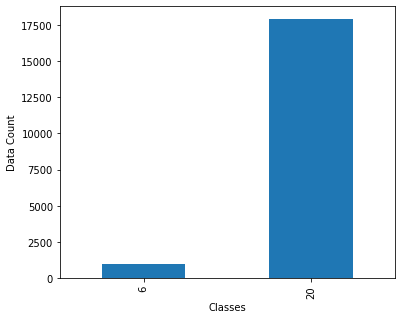

In [19]:
# ANSWER to Q2 goes here
########################
print(twenty_groups.target.size)

df2 = pd.DataFrame(twenty_groups.target, columns = ['Data'])
df_data_sum = df.groupby('Data').size()

print(df_data_sum.head(50))

df_data_sum.plot(kind='bar', ylabel='Data Count', xlabel='Classes', figsize=(6, 5))

# Some of the classes have more datasets than others 

In [20]:
from sklearn.model_selection import train_test_split

#Split the data to have a 10% validation set. 
twenty_g_X_train, twenty_g_X_test, twenty_g_y_train, twenty_g_y_test = \
train_test_split(twenty_groups.data, twenty_groups.target, 
                 test_size=0.10, random_state=21)

**PRE Q3:** Let's create a pipeline that creates the vectors representing the documents, and then classify them using 5 Nearest Neighbor classifier.


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', KNeighborsClassifier())])

# and do a gridsearchCV to do cross validation 
from sklearn.model_selection import GridSearchCV
# We are not doing hyperparameter optimization, so empty parameters dictionary passed
# Using GridSearchCV here, only for cross validation 
parameters = {}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=1,n_jobs=-1)

# Running the experiments 
grid_search.fit(twenty_g_X_train, twenty_g_y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

**PreQ3c**: This is one way to display classification report: 

In [22]:
from sklearn.metrics import classification_report

# Using the predictor found to be best to predict the validation set
predicted1 = grid_search.predict(twenty_g_X_test)

from sklearn.metrics import classification_report
print(classification_report(twenty_g_y_test,
                            predicted1, 
                            target_names=["for-sale", "others"]))

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(twenty_g_y_test, predicted1))

              precision    recall  f1-score   support

    for-sale       0.81      0.39      0.53       107
      others       0.96      0.99      0.98      1778

    accuracy                           0.96      1885
   macro avg       0.89      0.69      0.75      1885
weighted avg       0.96      0.96      0.95      1885

Accuracy: 0.9602122015915119


## Q3a: GridSearchCV for hyperparameter optimization
Rerun this experiment to see which k in kNN, gives best f1-score 
Use 
```
parameters = {"model__n_neighbors" : range(1,11,3)}
```
you will be testing for k values  [1, 4, 7, 10]

The experiments may take 5-10 minutes, as kNN classifier is not really a model, 
but compares with all entries in runtime!
 

In [23]:
# ANSWER to Q3a goes here
########################
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', KNeighborsClassifier())])

# and do a gridsearchCV to do cross validation 
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV here, only for cross validation 
parameters = {"model__n_neighbors" : range(1,11,3)}

grid_search1 = GridSearchCV(pipe, parameters, cv=10, scoring='f1_weighted', verbose=1,n_jobs=-1)

# Running the experiments 
grid_search1.fit(twenty_g_X_train, twenty_g_y_train)

grid_search1.cv_results_

results_df1 = pd.DataFrame(grid_search1.cv_results_)
results_df1

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,6.523838,0.098939,2.840841,0.079782,1,{'model__n_neighbors': 1},0.964045,0.966109,0.967025,0.964884,0.971051,0.967348,0.967806,0.965522,0.967551,0.961402,0.966274,0.002444,1
1,6.519542,0.079786,3.061063,0.085357,4,{'model__n_neighbors': 4},0.964620,0.962653,0.962572,0.960654,0.962825,0.964194,0.961923,0.958892,0.962420,0.960880,0.962163,0.001605,2
2,6.544325,0.081170,3.054052,0.111472,7,{'model__n_neighbors': 7},0.962537,0.957747,0.950095,0.955082,0.959898,0.959686,0.958515,0.953537,0.950735,0.956024,0.956385,0.003859,3
3,6.462106,0.092916,3.051923,0.132992,10,{'model__n_neighbors': 10},0.961826,0.951542,0.950112,0.955019,0.956133,0.961101,0.957761,0.953537,0.951698,0.956955,0.955568,0.003771,4


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', LinearSVC())])

# and do a gridsearchCV to do cross validation 
from sklearn.model_selection import GridSearchCV
# We are not doing hyperparameter optimization, so empty parameters dictionary passed
# Using GridSearchCV here, only for cross validation 
parameters = {}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=1)

# Running the experiments 
grid_search.fit(twenty_groups.data, twenty_groups.target)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   48.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

## Q3b: Run again for 2,3
in 3a, you must found best accuracy happened at 1 and 4, so you want to look at 2, 3 too, maybe best is between k=1 and k=4.
use 


```
parameters = {"model__n_neighbors" : (2, 3)}
```



In [25]:
pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', KNeighborsClassifier())])

# and do a gridsearchCV to do cross validation 

# Using GridSearchCV here, only for cross validation 
parameters = {"model__n_neighbors" : (2, 3)}

grid_search2 = GridSearchCV(pipe, parameters, cv=10, scoring='f1_weighted', verbose=1,n_jobs=-1)

# Running the experiments 
grid_search2.fit(twenty_g_X_train, twenty_g_y_train)

grid_search2.cv_results_

results_df2 = pd.DataFrame(grid_search2.cv_results_)
results_df2

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,6.516785,0.070670,2.924344,0.085877,2,{'model__n_neighbors': 2},0.961334,0.960162,0.963424,0.955971,0.961545,0.962322,0.961567,0.956150,0.962748,0.956624,0.960185,0.002710,2
1,6.518422,0.125152,2.989843,0.082615,3,{'model__n_neighbors': 3},0.965751,0.962624,0.963532,0.959053,0.965450,0.963662,0.964991,0.954168,0.963423,0.960069,0.962272,0.003398,1



For the best performing kNN classifier you found, 
##Q3c:  display classification_report like above in PreQc3, and 
##Q3d: the confusion matrix...

In [26]:
# ANSWER to Q3c goes here
########################

# The best performance was K=1
# grid_search1 had K=1

# Using the predictor found to be best to predict the validation set
best_predicted = grid_search1.predict(twenty_g_X_test)

print(classification_report(twenty_g_y_test,
                            best_predicted, 
                            target_names=["for-sale", "others"]))

print("Accuracy:", accuracy_score(twenty_g_y_test, best_predicted))

              precision    recall  f1-score   support

    for-sale       0.74      0.68      0.71       107
      others       0.98      0.99      0.98      1778

    accuracy                           0.97      1885
   macro avg       0.86      0.83      0.85      1885
weighted avg       0.97      0.97      0.97      1885

Accuracy: 0.9681697612732095


In [27]:
# ANSWER to Q3d goes here
########################
from sklearn.metrics import confusion_matrix

print(confusion_matrix(twenty_g_y_test, best_predicted))


[[  73   34]
 [  26 1752]]
